## Lab 1 (January 10):
### Introduction and Data Visualization 1

Course page: https://ambujtewari.github.io/stats306-winter2022/

Lab page: https://bosafoagyare.netlify.app/courses/stats306-w22/

# 1. Introduction to R

## 1.1 R Packages
 

In [39]:
install.packages("gapminder") ## Use the install.packages("<PACKAGE NAME>") command to install packages in R
library(gapminder)            ## To load a package (already installed) use the library(<PACKAGE NAME>) command
library(tidyverse)            ## You can load lots of packages together as library(<PACKAGE1>, <PACKAGE2>, <PACKAGE3>)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(gapminder, tidyverse)

### 1.2 Assignment and operations

In [ ]:
#variable assignments
u <- 3              ## this is considered standard
v = -2              ## this is accepted
x <- 6
y <- 'hello world'  ## 'hello world' is a string
y <- "hello world"  ## also double quotes
z <- TRUE           ## boolean variable (also T/F can be used for TRUE/FALSE but not True/False) 

#Few examples of operation
u + x
x/v

Challenge: 
- add x and y
- add x and z   
What do you observe?

In [ ]:
# your code here

## 1.3 Using functions

In [ ]:
?print()    ## use '?' to look up documentation of functions

[1] 2

In [ ]:
abs(v)
round(sqrt(8), digits = 3)

[1] 2

[1] 2.828

In [ ]:
l <- 5; b <- 3    ## Not recommended for readability
rect_area = l * b
print(rect_area)

[1] 15


Challenge: print the volume of a cylinder of radius 5 cm and height 8 cm.  
_Hint_: volume = $\pi r^2h$


In [ ]:
## your code here.

## 1.4 Vectors

In [ ]:
## Creating vector
vec1 <- c(1, 2, 3, 4, 5, 6, 7, 8)      ## using the combine 'c()' function
vec2 <- 1:8                            ## using sequencing of difference 1
vec3 <- seq(from = 1, to = 8, by = 1)  ## using the seq command. Gives flexibity in steps

In [ ]:
print(vec1)
print(vec2)
print(vec3)

In [ ]:
## Extra
vec4 <- c("a", "b", "c", "d") ## lowercase letters
vec5 <- letters[1:4]          ## LETTERS for uppercase
vec6 <- c(vec4, "e,", "f", c("i", "j"))
print(vec4)
print(vec5)
print(vec6)



Challenge: why is one of the commands below not working?
- `vec7 <- c("a", "b", 4)`
- `vec8 <- c("a", "b", "4)`

In [ ]:
## Try running here

In [ ]:
## Selecting Vector Elements
vec1[2]              ## extract element 2 (position 2)
vec1[-2]             ## extract all but element 2
vec6[-(2:4)]         ## what do you think is happening
vec6[c(1, 3, 6)]     ## what about this?
vec6[vec6 %in% vec4] ## intersection operator. Note larger vector before smaller


In [ ]:
## Basic vetor algebra
vec1 + 4      ## each element gets increment by 4
vec1 + vec2   ## adds vectors element-wise
vec1*vec2     ## the element-wise product of vectors
vec1%*%vec2   ## the dot product of vectors (should be conformable)



Challenge: Exponentiate each element of `vec1` by 3

In [ ]:
## your code here


In [ ]:
## Useful Vector Functions
length(vec1)
min(vec1)
max(vec1)
mean(vec1)
sum(vec1)

## 1.5 Logical Operators

In [ ]:
## Negation
a = TRUE
b = c(TRUE, FALSE)

!a      ## use '!' for negation (not) in R
!b

In [ ]:
## comparison
x = c(1, 3, 5)
y = c(2, 3, 4)

x == y   ## element-wise equality
x != y   ## what does this do?
x > y    ## greater than
x >= y   ## greater than or equal to

In [ ]:
## 'and' and 'or'
(5>2) | (1 == 0) ## what do you think?
(5>2) & (1 == 0) ## and this?

**Useful**: More about base R can be found here: [base R cheat sheet](https://github.com/rstudio/cheatsheets/blob/main/base-r.pdf)

# 2. Data
## 2.1 Creating Data

In [5]:
#create my own data set
pets = tibble(
  name   = c('Nikita', 'Simons', 'Pockets', 'Eres'),    
  age    = sample(x = 2:12, size = 4, replace = FALSE), ## randomly sample 4 numbers from 2 to 12
  weight = c(24, 16, 12, 18),                          
  class  = c('dog', 'cat', 'cat', 'dog')
)

## This is an example of a rectangular data. Each row is a vector of same type of elements

In [ ]:
pets

In [ ]:
print(pets)

## 2.2 Subsetting the data

In [ ]:
## Using [row, column]
pets[2,3]           ## row 2, column 3 (by position)
pets[, 1]           ## all rows, column 1 (this is used to subset an entire variable)
pets[1, ]           ## all columns, row 1 (this is used to subset a record)


In [ ]:
pets[c(1,4), 1:3]  ## What is happening?

In [ ]:
## We can also subset a column using the dollar ($) sign
pets$name
pets$class

## 2.3 Creating new columns, changing existing data and adding new rows (records)

In [25]:
## Let's add age and weight as a new column
pets$age_weight = pets$age + pets$weight
print(pets)

# A tibble: 4 × 5
  name      age weight class age_weight
  <chr>   <int>  <dbl> <chr>      <dbl>
1 Nikita      2     24 dog           26
2 Simons      3     16 cat           19
3 Pockets     9     12 cat           21
4 Eres        5     18 dog           23


In [26]:
## We got a new pet by name Scooby-Doo. Let's welcome her to the family
new_pet = tibble(
  name       = "Scooby-Doo",    
  age        = 5, 
  weight     = 10,                          
  class      = 'dog',
  age_weight = age + weight
)

## we use the rbind() function to add records
## note that this will work ONLY IF the new record (tibble) has exact same column names anc types as the old data
## similarly, we can use colbind to add a new column

pets_fam = rbind(pets, new_pet)
print(pets_fam)

# A tibble: 5 × 5
  name         age weight class age_weight
  <chr>      <dbl>  <dbl> <chr>      <dbl>
1 Nikita         2     24 dog           26
2 Simons         3     16 cat           19
3 Pockets        9     12 cat           21
4 Eres           5     18 dog           23
5 Scooby-Doo     5     10 dog           15


## 3. Visualization

In [40]:
## Now we load our gapminder data
dat = gapminder
head(dat) ## get first 6 rows (record). To get any number use head(dat, n = <NUMBER>)


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [ ]:
tail(dat) ## get last 6 rows

## 3.1 Plotting with ggplot2

All grammatical elements  

| Element| Description|
|:---   |:---|
|Data    | The dataset being plotted|
|Aesthetics | The scales onto which we map our data|
|Geometries | The visual elements used for our data|
|Facets | Plotting small multiples|
|Statistics | Representations of our data to aid understanding|
|Coordinates | The space on which the data will be plotted|
|Themes | All non-data ink|

_Source: DataCamp_

Syntax:
> `ggplot(data = <DATA>) +`   
>  &nbsp; &nbsp;&nbsp;&nbsp;`<GEOM_FUNCTION>( `  
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`mapping = aes(<MAPPINGS>),`  
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`stat = <STAT>, `  
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`position = <POSITION>`  
>  &nbsp; &nbsp;&nbsp;&nbsp;`) + `   
> &nbsp; &nbsp;&nbsp;&nbsp; `<COORDINATE_FUNCTION> + `   
> &nbsp; &nbsp;&nbsp;&nbsp;` <FACET_FUNCTION> +`  
>  &nbsp; &nbsp;&nbsp;&nbsp;`<LABS>`   


**We are going to look the first three today**

In [ ]:
## Scatter plot of Life Expectancy against GDP per capita
ggplot(data = dat) + 
  geom_point(mapping = aes(x = lifeExp, y = gdpPercap)) + 
  labs(x     = "Life Expectancy",
       y     = "GDP per capita",
       title = "Countries' GDP per capita against Life expectancy")

In [ ]:
## Let's differentiate plots by continent
ggplot(data = dat) + 
  geom_point(mapping = aes(x = lifeExp, y = gdpPercap, color = continent)) + 
  labs(x     = "Life Expectancy",
       y     = "GDP per capita",
       title = "Countries' GDP per capita against Life expectancy")

In [ ]:
## What if we did same by year? What do you observe?
ggplot(data = dat) + 
  geom_point(mapping = aes(x = lifeExp, y = gdpPercap, color = year)) + 
  labs(x     = "Life Expectancy",
       y     = "GDP per capita",
       title = "Countries' GDP per capita against Life expectancy")

In [ ]:
## Could we get a better background (theme)? 
ggplot(data = dat) + 
  geom_point(mapping = aes(x = lifeExp, y = gdpPercap, color = continent)) + 
  labs(x     = "Life Expectancy",
       y     = "GDP per capita",
       title = "Countries' GDP per capita against Life expectancy") +
  theme_bw()

## 4. Excercise

1. From the `pets_fam` data, add two pets of your liking. We realised `Nikita` is actually 2 years younger than her age. How would you rectify this? How would you filter the dataset to extract only dogs?  




## Soluion 1

In [27]:
## adding two new pets
## create a tibble and rbind with old data
## because they're two, each variable gets two new data points
new_pets = tibble(
  name       = c("Chelsea", "Olston"),    
  age        = c(8, 13), 
  weight     = c(22, 45),                          
  class      = c('cat', 'cat'),
  age_weight = age + weight
)

## now bind it with the old data
pets_family = rbind(pets_fam, new_pets)
print(pets_family)

# A tibble: 7 × 5
  name         age weight class age_weight
  <chr>      <dbl>  <dbl> <chr>      <dbl>
1 Nikita         2     24 dog           26
2 Simons         3     16 cat           19
3 Pockets        9     12 cat           21
4 Eres           5     18 dog           23
5 Scooby-Doo     5     10 dog           15
6 Chelsea        8     22 cat           30
7 Olston        13     45 cat           58


In [ ]:
## correcting Nikita's age
## note that this step requires we update the age_weight variable too to make that variable make sense
## first step is to locate the element representing Nikita's age and her name
## then we set this element to the right value

pets_family[1, 2] ## this gets us that element but we actually want to reset
pets_family[1, 2]                                   <- pets_family[1, 2] - 2                                     ## option 1
pets_family[which(pets_family$name == "Nikita"), 2] <- pets_family[which(pets_family$name == "Nikita"), 2] - 2   ## option 2
pets_family[pets_family$name %in% "Nikita", 2]      <- pets_family[pets_family$name %in% "Nikita", 2] - 2        ## option 3

## Even more complex but dynamic
pets_family[pets_family$name %in% "Nikita", pets_family$age[pets_family$name == "Nikita"]] <- (pets_family[pets_family$name %in% "Nikita",
                                                                                                pets_family$age[pets_family$name == "Nikita"]] - 2) ## option 4
## so you see, there are several ways of acomplishing same task in R. 
## note that you need to run just one of them. 
## if you want to see if all do the same job, you need to re-run all the pets_family chunks in the previous cells to reset to the old value
## later, we will even learn how to use a simple and more fun way to achieve same task, thanks to Tidyverse.
## we will leverage the power of the pipe operator "%>%" and functions like select() and filter() to do more fancy stuff



In [37]:
## filter only dogs' data
pets_family[which(pets_family$class == "dog"), ]  ## option 1
subset(pets_family, class == "dog")               ## option 2. we will look at this later in data manipulation


name,age,weight,class,age_weight
<chr>,<dbl>,<dbl>,<chr>,<dbl>
Nikita,0,24,dog,26
Eres,5,18,dog,23
Scooby-Doo,5,10,dog,15


name,age,weight,class,age_weight
<chr>,<dbl>,<dbl>,<chr>,<dbl>
Nikita,0,24,dog,26
Eres,5,18,dog,23
Scooby-Doo,5,10,dog,15


2. From the `gapminder` data, explore more aesthetics like size, shape etc aside from color. Make a scatter plot of any two continuous variables of your liking. How would you plot the data for only "`Europe`an" countries? What about only the `United States`?


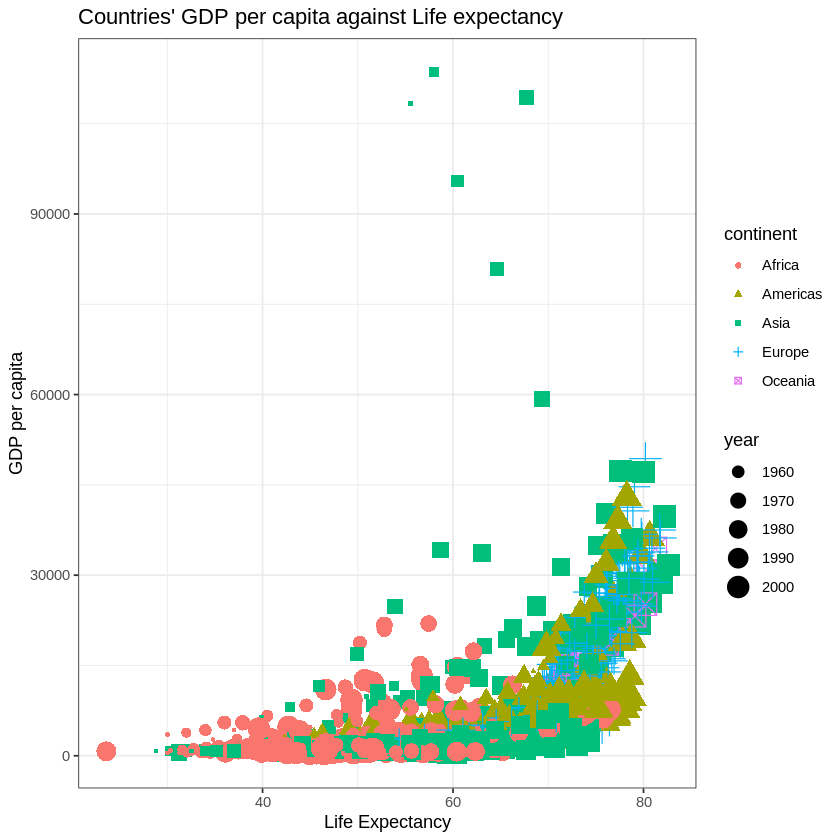

In [41]:
## Plotting by color, shape and size
ggplot(data = dat) + 
  geom_point(mapping = aes(x = lifeExp, y = gdpPercap, color = continent, shape = continent, size = year)) + 
  labs(x     = "Life Expectancy",
       y     = "GDP per capita",
       title = "Countries' GDP per capita against Life expectancy") +
  theme_bw()


In [43]:
## plot data for European countries
euro_countries <- dat[which(dat$continent == "Europe"), ]
euro_countries

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Albania,Europe,1952,55.230,1282697,1601.056
Albania,Europe,1957,59.280,1476505,1942.284
Albania,Europe,1962,64.820,1728137,2312.889
Albania,Europe,1967,66.220,1984060,2760.197
Albania,Europe,1972,67.690,2263554,3313.422
Albania,Europe,1977,68.930,2509048,3533.004
Albania,Europe,1982,70.420,2780097,3630.881
Albania,Europe,1987,72.000,3075321,3738.933
Albania,Europe,1992,71.581,3326498,2497.438


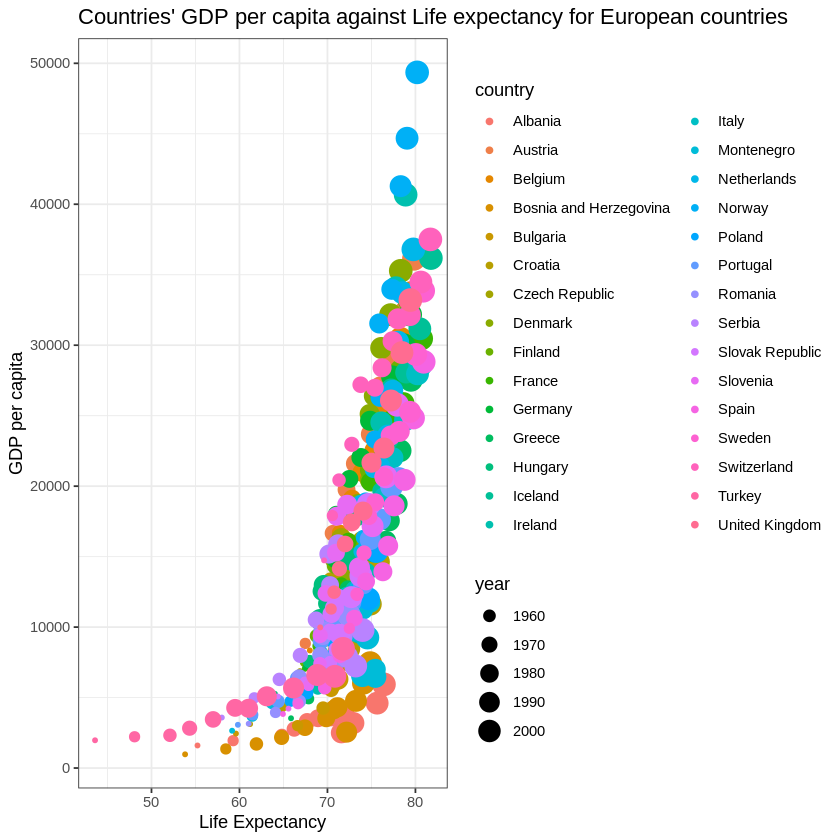

In [46]:
## Plotting 
ggplot(data = euro_countries) + 
  geom_point(mapping = aes(x = lifeExp, y = gdpPercap, color = country, size = year)) + 
  labs(x     = "Life Expectancy",
       y     = "GDP per capita",
       title = "Countries' GDP per capita against Life expectancy for European countries") +
  theme_bw()

In [49]:
## now the US
USA <- dat[dat$country == "United States", ]

In [50]:
USA

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
United States,Americas,1952,68.440,157553000,13990.48
United States,Americas,1957,69.490,171984000,14847.13
United States,Americas,1962,70.210,186538000,16173.15
United States,Americas,1967,70.760,198712000,19530.37
United States,Americas,1972,71.340,209896000,21806.04
United States,Americas,1977,73.380,220239000,24072.63
United States,Americas,1982,74.650,232187835,25009.56
United States,Americas,1987,75.020,242803533,29884.35
United States,Americas,1992,76.090,256894189,32003.93


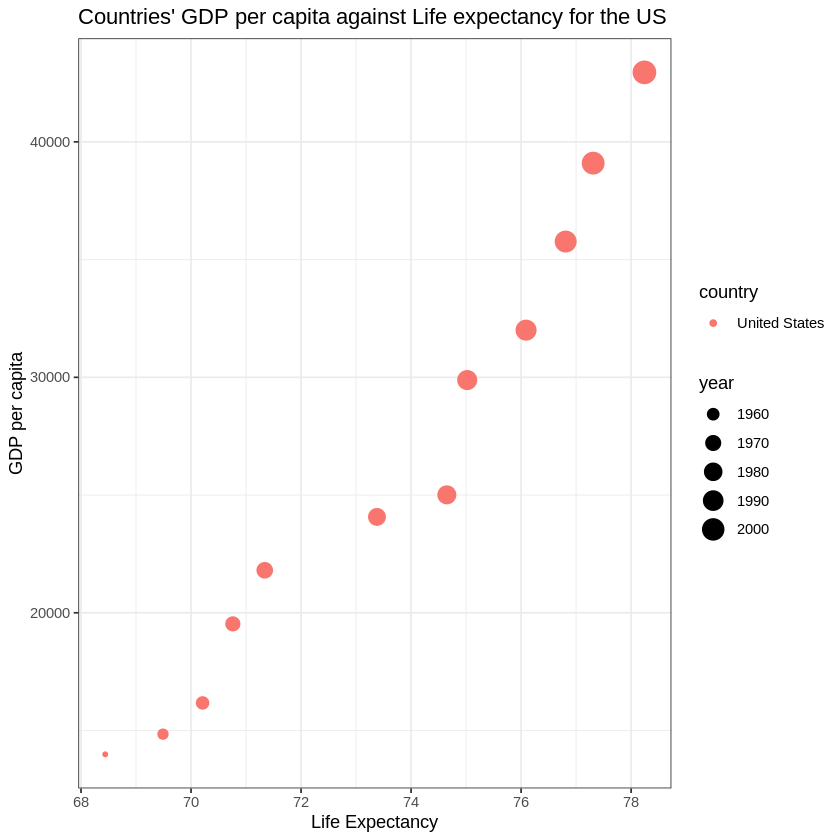

In [51]:
ggplot(data = USA) + 
  geom_point(mapping = aes(x = lifeExp, y = gdpPercap, color = country, size = year)) + 
  labs(x     = "Life Expectancy",
       y     = "GDP per capita",
       title = "Countries' GDP per capita against Life expectancy for the US") +
  theme_bw()